In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

import time

In [45]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [46]:
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'el salvador', 'religion_school', 'test_ban', 'nicaragua','missile', 'immigration', 'synfuels', 'education_spending', 'superfund', 'crime', 'duty_free', 'south_africa']

In [47]:
Congress = pd.DataFrame(df)

In [48]:
Congress.shape

(434, 17)

In [49]:
Congress.head()

,party,infants,water,budget,physician,el salvador,religion_school,test_ban,nicaragua,missile,immigration,synfuels,education_spending,superfund,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [50]:
Congress.replace('?', np.nan, inplace=True)

In [51]:
Congress.head()

,party,infants,water,budget,physician,el salvador,religion_school,test_ban,nicaragua,missile,immigration,synfuels,education_spending,superfund,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [52]:
Congress.replace('n', '0', inplace=True)

In [53]:
Congress.replace('y', '1', inplace=True)

In [54]:
Congress.head()

,party,infants,water,budget,physician,el salvador,religion_school,test_ban,nicaragua,missile,immigration,synfuels,education_spending,superfund,crime,duty_free,south_africa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
1,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [55]:
Congress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
party                 434 non-null object
infants               422 non-null object
water                 386 non-null object
budget                423 non-null object
physician             423 non-null object
el salvador           419 non-null object
religion_school       423 non-null object
test_ban              420 non-null object
nicaragua             419 non-null object
missile               412 non-null object
immigration           427 non-null object
synfuels              414 non-null object
education_spending    403 non-null object
superfund             409 non-null object
crime                 417 non-null object
duty_free             406 non-null object
south_africa          330 non-null object
dtypes: object(17)
memory usage: 57.7+ KB


In [56]:
Congress.columns

Index(['party', 'infants', 'water', 'budget', 'physician', 'el salvador',
       'religion_school', 'test_ban', 'nicaragua', 'missile', 'immigration',
       'synfuels', 'education_spending', 'superfund', 'crime', 'duty_free',
       'south_africa'],
      dtype='object')

In [63]:
X = Congress[['el salvador', 'nicaragua', 'south_africa', 'infants', 'water', 'budget', 'physician', 'religion_school', 'test_ban', 'missile', 'immigration', 'synfuels', 'education_spending', 'superfund', 'crime', 'duty_free']]
Y = Congress[['party']]

In [64]:
Congress.isnull().sum()

party                 0
infants               0
water                 0
budget                0
physician             0
el salvador           0
religion_school       0
test_ban              0
nicaragua             0
missile               0
immigration           0
synfuels              0
education_spending    0
superfund             0
crime                 0
duty_free             0
south_africa          0
dtype: int64

In [65]:
Congress.shape

(232, 17)

In [66]:
Congress = Congress.dropna()

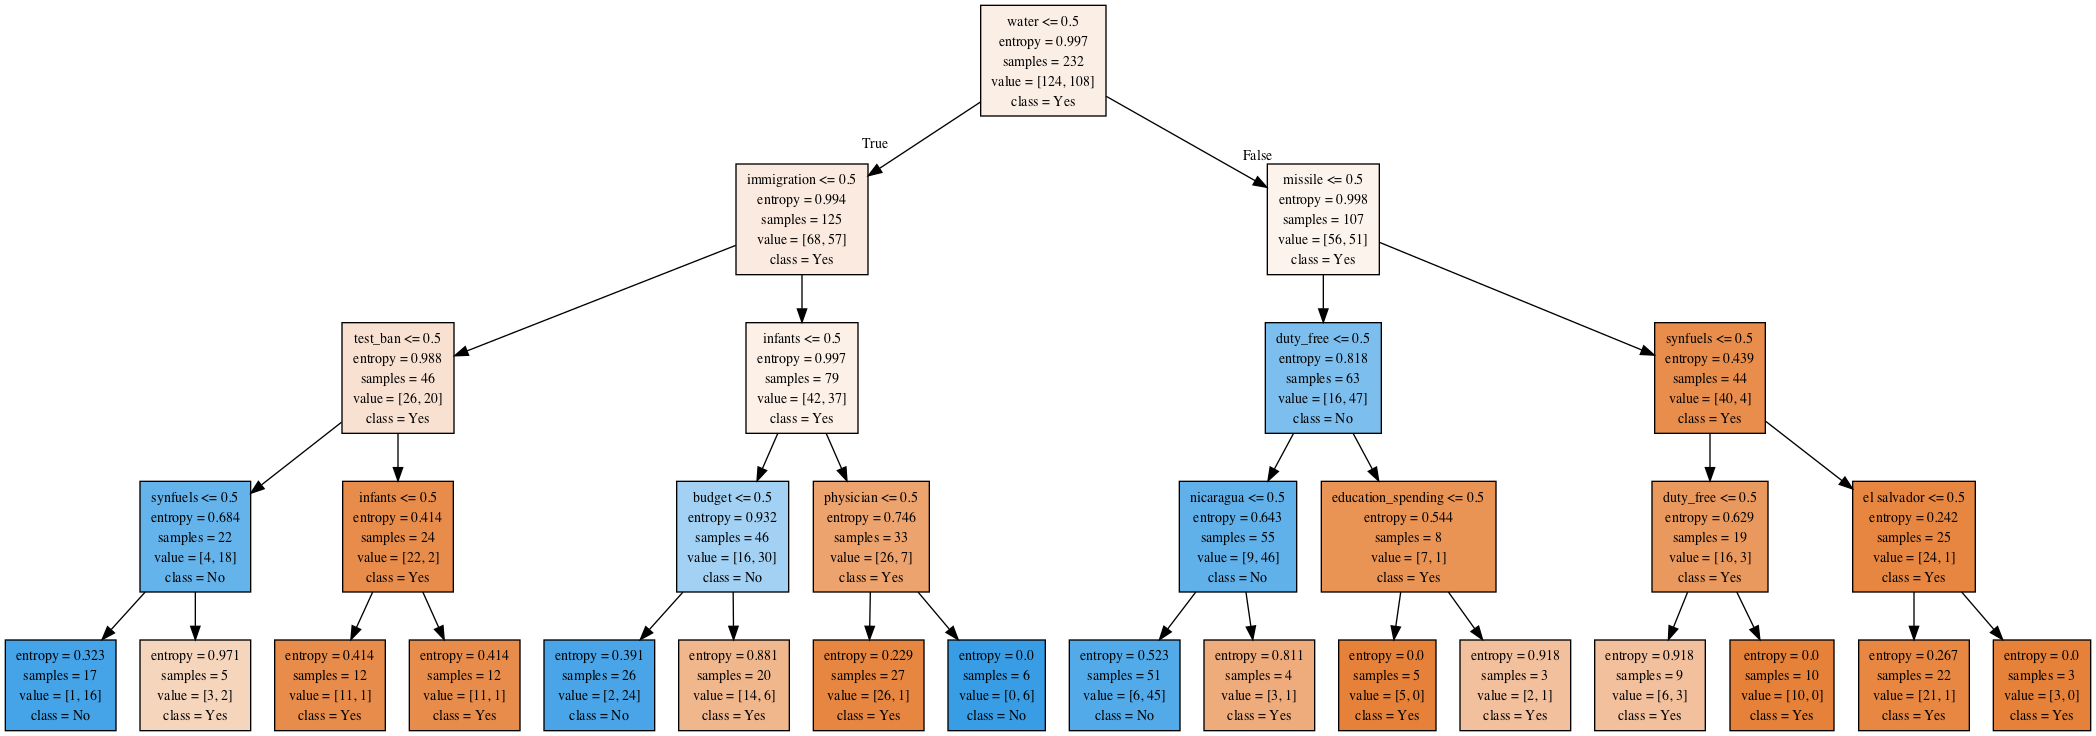

In [68]:

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=['el salvador', 'nicaragua', 'south_africa', 'infants', 'water', 'budget', 'physician', 'religion_school', 'test_ban', 'missile', 'immigration', 'synfuels', 'education_spending', 'superfund', 'crime', 'duty_free'],
    class_names=['Yes', 'No'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [74]:
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.291534423828125e-05 seconds ---


In [70]:
rfc = ensemble.RandomForestClassifier()
X = Congress.drop('party', 1)
Y = Congress['party']
cross_val_score(rfc, X, Y, cv=10)

array([1.        , 0.875     , 1.        , 1.        , 1.        ,
       0.95652174, 0.95652174, 0.91304348, 0.86363636, 0.95454545])

In [72]:
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.891654968261719e-05 seconds ---


**The time for the decision tree was approx. 4.3 seconds while the time for Random Forest was approx. 7.8 seconds